# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images
Similarity comparation is made both on text extracted from images
To identify the medicine of test image, we select the one with highest similarity score in database


# Following is the working flow diagram:
<hr>
<img src="noteimg/diagram.png" width="800">

# Following is the example result:
<hr>
<img src="noteimg/sampleresult.png" width="800">

In [2]:
# import all tools and libraries
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import numpy as np
import pandas as pd
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [3]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print('There are 130 languages available!')
print('We will use following languages:')
print(*langs, sep = '\n')

Will use tool 'Tesseract (sh)'
There are 130 languages available!
We will use following languages:
fra
eng
spa
chi_sim


In [4]:
# build globle variables:
all_res = [] 
dic = {'file': '-'}
for l in langs:
    dic[l] = '-'
files_grabbed = []

In [14]:
# ** This step is optional for real dataset
# Clean database, remove images with low quality of text recognition
all_files = [] #create list for all files
# Load all type of available image files
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
for files in ftypes:
    all_files.extend(glob.glob(files))
print ('There are ' + str(len(all_files)) + ' images loaded')

# Remove all images which has text less than 15 characters
count = 1
for f in all_files:
    #if count % 10 == 0 or count > (len(all_files)//10)*10:
    print(str(count) + '/' + str(len(all_files)) + ': ' + f + ' is being processed!')
    try:
        result = data_helpers.ext_txt(f, langs, dic, tool)
        total_length = 0
        for l in langs:
            length = len(result[l])
            total_length += length
        if total_length < 15:
            os.remove(f)
    except:
        os.remove(f)
    count += 1
all_files = []
for files in ftypes:
    all_files.extend(glob.glob(files))
print ('After clean, there are ' + str(len(all_files)) + ' images now')

There are 688 images loaded
1/688: images/86. image-01.jpg is being processed!
2/688: images/87. allergy-d.jpg is being processed!
3/688: images/35. honestgreen_images_84783891093.jpg is being processed!
4/688: images/69. 3146251_0000.jpg is being processed!
5/688: images/73. post-nasal-drip-causes-1024x1018.jpg is being processed!
6/688: images/81vt8Z5kjOL._SL1500_.jpg is being processed!
7/688: images/34. 61i8jay1xol.jpg is being processed!
8/688: images/Enzy-Restore.jpg is being processed!
9/688: images/96. 002145708.jpg is being processed!
10/688: images/58. maxresdefault.jpg is being processed!
11/688: images/46. zyrtec.jpg is being processed!
12/688: images/30. maxresdefault.jpg is being processed!
13/688: images/91. 001389669.jpg is being processed!
14/688: images/29. ef414c05-e257-4e5e-8d4e-77b91d35c666-02.jpg is being processed!
15/688: images/91. natural-allergy-relief-for-your-achoos.jpg is being processed!
16/688: images/TB1fWrVJVXXXXaOXXXXXXXXXXXX_!!2-item_pic.jpg is being

117/688: images/81pclr8pzkL._SL1500_.jpg is being processed!
118/688: images/57. 91jczz8937l.jpg is being processed!
119/688: images/242615-DEFAULT-L.jpg is being processed!
120/688: images/50. c792e37f-3d03-4fa3-ad53-75bd5d4cf166-02.jpg is being processed!
121/688: images/Opti-Sleep-60-caps-1.jpg is being processed!
122/688: images/62. 22.jpg is being processed!
123/688: images/77. otc148448_pri01.jpg is being processed!
124/688: images/39. 61395.jpg is being processed!
125/688: images/25. s-l1000.jpg is being processed!
126/688: images/12. 900.jpg is being processed!
127/688: images/71. 4845.jpg is being processed!
128/688: images/71. 9317935000298_71_2147483647_aerius_5mg_tablets_4_1_1.jpg is being processed!
129/688: images/47. 81kncgubthl._sl1500_.jpg is being processed!
130/688: images/14. 892f4182393545d7e4fa031fd5398a75.jpg is being processed!
131/688: images/26. children-claritin_1024x1024.jpg is being processed!
132/688: images/001488880.jpg is being processed!
133/688: image

235/688: images/7. 900.jpg is being processed!
236/688: images/47. slide-9.jpg is being processed!
237/688: images/48. 81z9isza2%2bl._sl1500_.jpg is being processed!
238/688: images/43. qc-cetirizine-childrens-allergy-relief-syrup-grape-flavor-4-fl-oz-generic-zyrtec.jpg is being processed!
239/688: images/2. premier-value-44-462-1.jpg is being processed!
240/688: images/45. s-l1600.jpg is being processed!
241/688: images/323900016194.jpg is being processed!
242/688: images/9. ef414c05-e257-4e5e-8d4e-77b91d35c666-01.jpg is being processed!
243/688: images/24. 041100806574.jpg is being processed!
244/688: images/42. cd98ef7e011cff37238afc65199cedf6.jpg is being processed!
245/688: images/64. prod_ec_2261717302??hei=64&wid=64&qlt=50.jpg is being processed!
246/688: images/95. allergy-asthma-sinus-center-services-lexington-ky.jpg is being processed!
247/688: images/58. lp14967_allergytabs10mg45ct.jpg is being processed!
248/688: images/88. 900.jpg is being processed!
249/688: images/80. ch

351/688: images/40. 71legccootl._sl1000_.jpg is being processed!
352/688: images/70. free-aminos-100-capsules-by-allergy-research-group-extra3.jpg is being processed!
353/688: images/23. diphenydramine-fig1.jpg is being processed!
354/688: images/900 (6).jpg is being processed!
355/688: images/57543.jpg is being processed!
356/688: images/50. 900.jpg is being processed!
357/688: images/51. honestgreen_images_79565006215.jpg is being processed!
358/688: images/4. kirkland-44-329-1.jpg is being processed!
359/688: images/82. safeway-44-329-1.jpg is being processed!
360/688: images/75. 900_4293b5ca-b2fb-4c18-bc2a-406022453075_900x.jpg is being processed!
361/688: images/38. maxresdefault.jpg is being processed!
362/688: images/14. 91r0aukuhyl._sl1500_.jpg is being processed!
363/688: images/007401.jpg is being processed!
364/688: images/17. 15153c32e2cec518f9a28517fe005301--health-remedies-sinus-remedies.jpg is being processed!
365/688: images/44. o.jpg is being processed!
366/688: images

469/688: images/56. 819cbenxmel.jpg is being processed!
470/688: images/7. childrens-allergy-cherry-liquid-1.jpg is being processed!
471/688: images/47. zyrtec-walmart2.jpg is being processed!
472/688: images/900 (2).jpg is being processed!
473/688: images/original.jpg is being processed!
474/688: images/55. 5363a9c3ecad04341c445402-2732-1365.jpg is being processed!
475/688: images/18. 91r0aukuhyl._sl1500_.jpg is being processed!
476/688: images/36. zyrtec-allergy-no-copy.jpg is being processed!
477/688: images/21. 119160pvlr_ol.jpg is being processed!
478/688: images/66. hg0781005-1.jpg is being processed!
479/688: images/78. s-l1600.jpg is being processed!
480/688: images/11. 00312547204323.jpg is being processed!
481/688: images/64. d6fc54d2b808ac26314ad258844b0236--allergy-symptoms-allergies.jpg is being processed!
482/688: images/30. 2702812_0001.jpg is being processed!
483/688: images/90. 1492441121-1492441121-1736.jpg is being processed!
484/688: images/42. 002.jpg is being proc

/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


586/688: images/78. 2de90512-6a67-4f14-bfba-100c1b19eeba.png is being processed!
587/688: images/82. claritin_24_hour_non-drowsy_allergy_relief_10mg_tablets_1.png is being processed!
588/688: images/19. kids_chewables_hero_angle_2x.png is being processed!


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


589/688: images/58. extrastrength_product_0.png is being processed!
590/688: images/13. d_tablets_12hr_hero_front_2x.png is being processed!


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


591/688: images/18. 0030045020470_2000.png is being processed!


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


592/688: images/83. allergy-medicine-deals.png is being processed!
593/688: images/65. ijerph-13-01084-g001.png is being processed!
594/688: images/42. pepid%20for%20android%20drug-allergy%20checker%20results.png is being processed!
595/688: images/74. chart.png is being processed!
596/688: images/31. 63486dc2-3d11-47b9-b7ee-319d525f6f3e_3.d6f63bbeb70f86d84d8089faa2502fa7.png is being processed!
597/688: images/92. dc762e97-6276-4ece-b05b-b200df3969f5.png is being processed!
598/688: images/86. solutionimg_59e624c8f1ea8.png is being processed!
599/688: images/25. personal-care-us-2018-average-rank-vs-ownership-on-allergy-sinus-asthma-medicine-amazon-best-sellers-pages.png is being processed!
600/688: images/42. jrv170004t2.png is being processed!
601/688: images/66. largepreview.png is being processed!
602/688: images/70. 479-004-web-1.png is being processed!
603/688: images/75. 3325467-1455100374807.png is being processed!
604/688: images/63. largepreview.png is being processed!
605/6

/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


618/688: images/40. allproducts.png is being processed!
619/688: images/53. cover-image-asthma.png is being processed!
620/688: images/7. dc19e3f121777b159e8d7689b70c7f35.png is being processed!
621/688: images/85. 15-table1-1.png is being processed!
622/688: images/46. 4-facts-horizontal-1.png is being processed!
623/688: images/46. ooa7342t1.png is being processed!
624/688: images/51. largepreview.png is being processed!
625/688: images/1. base_tablets_hero_front_2x.png is being processed!


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


626/688: images/76. 222101-1487711232526.png is being processed!
627/688: images/69. d6a0ce55-fbad-4e68-a8be-6f3132eafafb_1.731296688aa9c8e1ca8e234797095d2a.jpeg is being processed!
628/688: images/87215a47-8ad4-4d99-a781-0d19225e0de4_1.f1e9b8ec2b157cf168fa77f3b729bbc5.jpeg is being processed!
629/688: images/30. 664d7a01-9149-407f-8b09-e7a5f3d08753_1.256a6e2e64809eec863de88bd309ddaa.jpeg is being processed!
630/688: images/5f76f6c2-060c-4efd-858b-cf2104f193de_1.82a40b93ecbc42aade5ecef2f45fb42a.jpeg is being processed!
631/688: images/76. cd9e3230-ae90-48ee-a156-0ee17eb2c027_1.8a37de86b3f63d35cd7804cbe1415121.jpeg is being processed!
632/688: images/72. zyr_300450205049_3010713_childrens_allergy_syrup_bubble_gum_4oz_00001_0.jpeg is being processed!
633/688: images/40362e47-9a5d-44f0-b312-9205ca0d20ef_1.a015e61d9e2180a0b39085e613ae0b51.jpeg is being processed!
634/688: images/39. fc0a9f5b-a44d-4d6f-8340-db4ad293a2b1_1.b539562270bbdc70893d49118cb4cdc4.jpeg is being processed!
635/688: im

In [5]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 

for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 688 images loaded


------fra
T4 | %% OLU  L  ALLERGY  Indoor « Outdoor Alirgis  24 Relief of  Sneezing hour Runny Nose Itchy, Watery Eyes Itchy Throat or Nose  A e  2 yrs.  & older  ®  “ wÏ/erÆ  Zy (4 E S  ALLERGY  24 Relief of Sneezing hour â‘;,,“ néNose … y, Watery Ey :tchy'ïhmtu
------eng
T | %% G2  e  VARSI E) g  Indoor & Outdoor Alirgis  24 Relief of  Sneezing hour Runny Nose Itchy, Watery Eyes Itchy Throat or Nose  sl A ]  2 yrs.  & older  )  . wf/Jﬁ;wfj  47 RTEC  NI Ch g  24 Relief of Sneezing hour. m i Nose : y, Watery Ey nchy'rhmm
------spa
U | Q% S  m  a 10  Indoor s Outdoor Alirgis  24 Relief of  Sneezing hour Runny Nose Itchy, Watery Eyes Itchy Throat or Nose  Ta E  2 yrs.  S older  O  Y wf/…/¡w13  Zy 3  ALLERGY  24 Relief of Sneezing hour m VNOse ¡4 y, Watery Ey ¡tchy'thmtar
------chi_sim
5 c  E  `. 二l 2  N 1 陶 : 沥 [ 河 仪 - - 5 ` [`』 山 -:  巳 077 0777 7 吴  ALLfRGY _ F1 一  I 医 20lh5tomine _ 国 Indoorna.0utdoonAllergies  (Indoor50Outdoor A"rgis  z4 Relief of f ′` 医 2 小 Relief of hCur “506ezing 途 

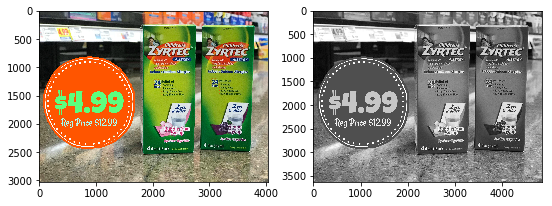

In [6]:
# Get a random image to show
randindex = randint(0, len(files_grabbed)-1)
process_image.improve(files_grabbed[randindex])
list2show = ['ori.jpg','gray.jpg']
plt.figure(figsize=(9,9))
columns = 2
for i, img in enumerate(list2show):
    img = Image.open(img)
    plt.subplot(len(list2show) / columns + 1, columns, i + 1)
    plt.imshow(img,cmap=plt.get_cmap("gray"))    
result = data_helpers.ext_txt(files_grabbed[randindex], langs, dic, tool)
for l in langs:
    print ('------' + l + '\n' + result[l])

In [7]:
#Following we recognize all images and write to database.
print('Following we recognize all images and write all text to database.')
i = 1
for f in files_grabbed:
    result = data_helpers.ext_txt(f, langs, dic, tool)
    time_str = datetime.datetime.now().isoformat()
    if i % 10 == 0 or i > (len(files_grabbed)//10)*10:
        print("{}: {}/{} processed".format(time_str, i, len(files_grabbed),))
    all_res.append(result.copy())
    i += 1
df = pd.DataFrame(all_res)
df.to_csv('result.csv', encoding='utf-8')
print('All images have been recognized and saved to result.csv')

Following we recognize all images and write all text to database.
2018-08-14T16:43:43.627006: 10/688 processed
2018-08-14T16:45:22.405976: 20/688 processed
2018-08-14T16:47:31.362335: 30/688 processed
2018-08-14T16:49:07.109636: 40/688 processed
2018-08-14T16:50:48.306408: 50/688 processed
2018-08-14T16:51:44.992322: 60/688 processed
2018-08-14T16:52:41.250340: 70/688 processed
2018-08-14T16:54:19.844886: 80/688 processed
2018-08-14T16:55:50.001123: 90/688 processed
2018-08-14T16:56:46.225068: 100/688 processed
2018-08-14T16:57:59.967966: 110/688 processed
2018-08-14T17:00:18.976032: 120/688 processed
2018-08-14T17:01:42.678818: 130/688 processed
2018-08-14T17:03:17.204140: 140/688 processed
2018-08-14T17:04:47.195349: 150/688 processed
2018-08-14T17:06:11.636999: 160/688 processed
2018-08-14T17:07:32.787949: 170/688 processed
2018-08-14T17:09:08.969748: 180/688 processed
2018-08-14T17:10:16.267175: 190/688 processed
2018-08-14T17:12:36.655076: 200/688 processed
2018-08-14T17:14:02.702

/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Im

2018-08-14T18:22:39.642179: 590/688 processed


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


2018-08-14T18:25:55.384557: 600/688 processed
2018-08-14T18:33:11.069640: 610/688 processed


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


2018-08-14T18:35:51.821651: 620/688 processed


/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/home/xxliu10/.local/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


2018-08-14T18:38:16.024682: 630/688 processed
2018-08-14T18:39:46.576503: 640/688 processed
2018-08-14T18:41:32.361369: 650/688 processed
2018-08-14T18:43:43.119194: 660/688 processed
2018-08-14T18:46:12.998939: 670/688 processed
2018-08-14T18:47:42.952690: 680/688 processed
2018-08-14T18:47:46.579331: 681/688 processed
2018-08-14T18:48:01.551791: 682/688 processed
2018-08-14T18:48:08.719693: 683/688 processed
2018-08-14T18:48:31.559884: 684/688 processed
2018-08-14T18:48:47.736929: 685/688 processed
2018-08-14T18:49:03.749017: 686/688 processed
2018-08-14T18:49:13.082328: 687/688 processed
2018-08-14T18:49:19.035786: 688/688 processed
All images have been recognized and saved to result.csv


In [74]:
#Save result to txt file for easy read
with open('result.txt', 'w', encoding = 'utf-8') as outf:
    for item in all_res:
        outf.write('--FileName:' + item['file'] + '\n')
        outf.write('--English:' + item['eng'] + '\n')
        outf.write('--Spanish:' + item['spa'] + '\n')
        outf.write('--French:' + item['fra']+ '\n')
        outf.write('--Chinese:' + item['chi_sim'] + '\n')

------fra
cough suppressant —topical analgesicst
------eng
[tv t lt ntopical analgesict
------spa
cough suppressant —topical analgesicto
------chi_sim
eeointme
131


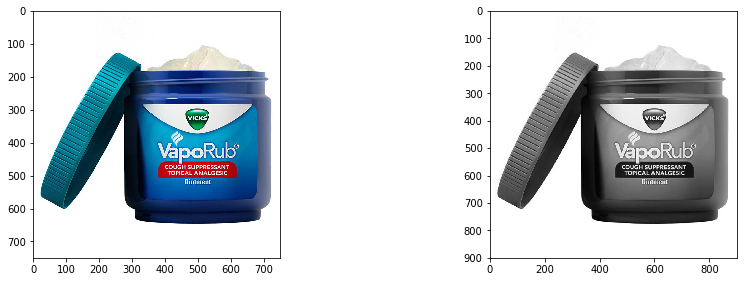

In [75]:
#Following is our test result
#Put test image as 'test.jpg' in the same foder of code
testf = 'test.jpg'
process_image.improve(testf)
list2show = ['ori.jpg','gray.jpg']
plt.figure(figsize=(15,10))
columns = 2
for i, img in enumerate(list2show):
    img = Image.open(img)
    plt.subplot(len(list2show) / columns + 1, columns, i + 1)
    plt.imshow(img,cmap=plt.get_cmap("gray"))    
result = data_helpers.ext_txt(testf, langs, dic, tool)
for l in langs:
    print ('------' + l + '\n' + result[l])
# Comparing with all records
ratiolist=[]
for res in all_res:
    s = ''
    sum = 0
    for l in langs:
        #s += l + ':' + str(data_helpers.similarity(res[l], result[l])) + ', '
        ratio = fuzz.partial_ratio(res[l], result[l])
        sum += ratio
    ratiolist.append(sum/len(langs))
print(len(ratiolist))

[59, 54, 65, 127, 37]
images/Adult_Cough_plus_Nighttime.jpg


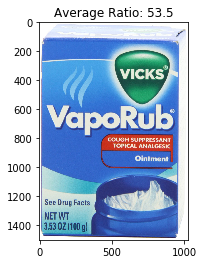

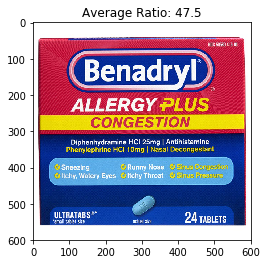

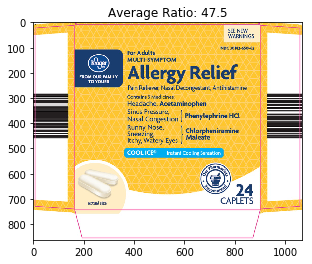

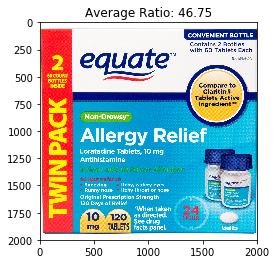

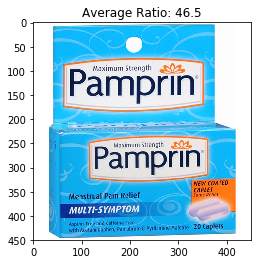

In [76]:
# Get top N results from database with maximum similarity
N = 5
topN = sorted(range(len(ratiolist)), key=lambda i: ratiolist[i], reverse=True)[:N]
print(topN)
for i,val in enumerate(topN):
    img = Image.open(all_res[val]['file'])
    plt.figure()
    plt.title('Average Ratio: ' + str(ratiolist[val]))
    plt.imshow(img) 
print(all_res[31]['file'])